In [8]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


from shephard import interfaces, apis

In [44]:
names = ['UP000000589_10090.fasta', 'UP000001940_6239.fasta',  'UP000005640_9606.fasta', 'UP000000803_7227.fasta', 'UP000002311_559292.fasta', 'UP000006548_3702.fasta', 'UP000001805_367110.fasta']
taxon2name = {}
taxon2name[10090]   = 'mouse'
taxon2name[3702]    = 'cress'
taxon2name[559292]  = 'yeast'
taxon2name[6239]    = 'nematode'
taxon2name[7227]    = 'fly'
taxon2name[9606]    = 'human'
taxon2name[367110]  = 'neurospora'

proteomes = {}

In [45]:
for n in names:
    species = taxon2name[int(n.split('_')[1].split('.')[0])]

    proteomes[species] = apis.uniprot.uniprot_fasta_to_proteome(f"data/{n}", invalid_sequence_action='convert')
    interfaces.si_domains.add_domains_from_file(proteomes[species], f"data2/shprd_domains_idrs_{n}.tsv")
                                      

In [46]:
fraction_disordered = {}
fraction_ordered = {}

# for each organism
for n in proteomes:

    # initialize total counters
    count_ordered = 0
    count_disordered = 0

    # cycle over each counter
    for p in proteomes[n]:

        # initialize a local counter
        local_disorder_count = 0
        for d in p.domains:            

            # this check is not strictly speaking necessary, but if this code 
            # were copied and pasted elsewhere avoids a silent bug where ALL
            # domains would be treated as IDRs; better safe than sorry!
            if d.domain_type == 'IDR':
                local_disorder_count = local_disorder_count + len(d)

        count_disordered = count_disordered + local_disorder_count
        count_ordered = count_ordered + (len(p) - local_disorder_count)

    # finally calculate fractions
    total = count_disordered + count_ordered
    fraction_disordered[n] = count_disordered/total
    fraction_ordered[n] = count_ordered/total
    

In [47]:
fraction_disordered = dict(sorted(fraction_disordered.items(), key=lambda item: item[1], reverse=True))


disorder_fracs = list(fraction_disordered.values())
ordered_fracs = []
plot_names = []
for i in fraction_disordered:
    ordered_fracs.append(fraction_ordered[i])
    plot_names.append(i)




In [55]:
ordered_fracs

[0.6203892113899702,
 0.6424920555141217,
 0.6695118475110882,
 0.6906509316196476,
 0.7324166767095138,
 0.7453042147057993,
 0.7534639245574922]

meta NOT subset; don't know how to subset; dropped


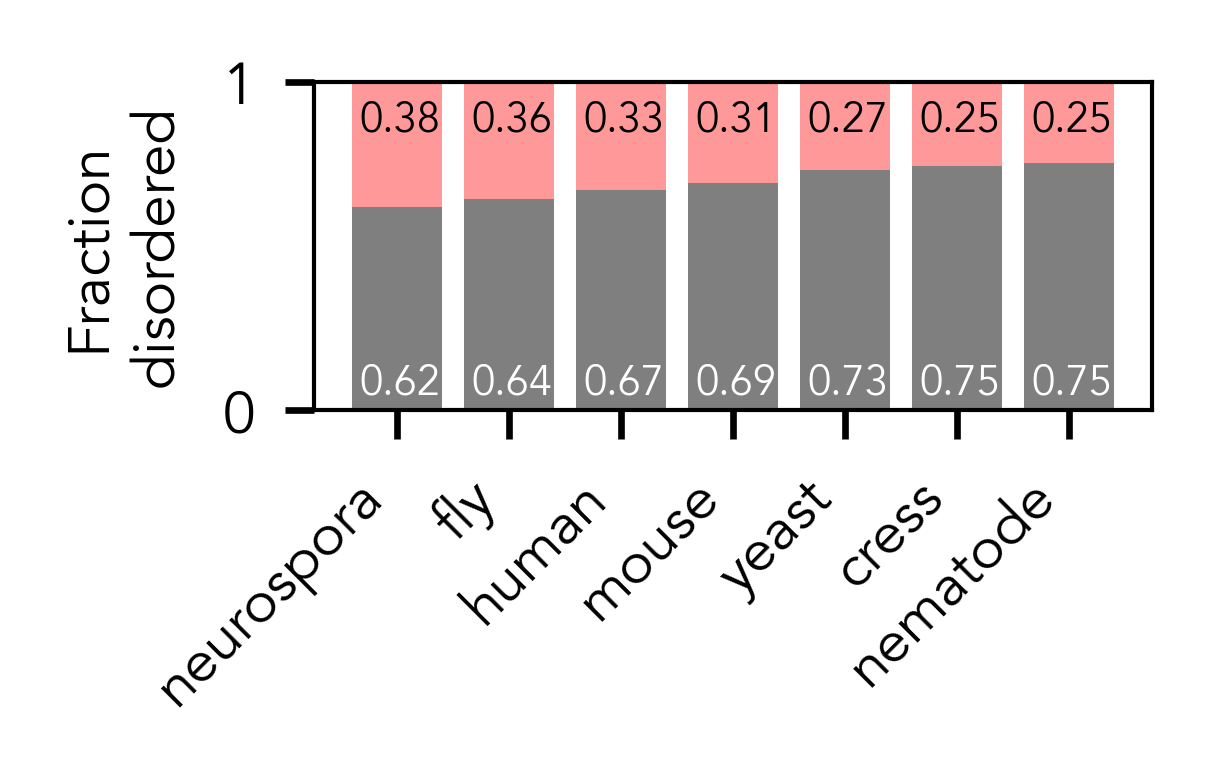

In [123]:
# Plot the first set of bars


fig, ax = plt.subplots(figsize=(2.2, 1.4), dpi=300, facecolor='w', edgecolor='k')

#figure(num=None, figsize=(2.2, 1.4), dpi=300, facecolor='w', edgecolor='k')
#ax = plt.gca()


ax.bar(plot_names, ordered_fracs, label='Bar 1', color='black', alpha=0.5)

# Plot the second set of bars on top of the first set
ax.bar(plot_names, disorder_fracs, label='Bar 2', color='red', bottom=ordered_fracs, alpha=0.4)
for i in range(0,len(plot_names)):
    plt.text(i-0.335, 0.05, f"{round(ordered_fracs[i],2)}", color='white', fontsize=5)
    plt.text(i-0.335, 0.85, f"{round(disorder_fracs[i],2)}", color='black', fontsize=5)

plt.ylim([0,1])
plt.yticks(fontsize=7)
plt.ylabel('Fraction\ndisordered', fontsize=7)
plt.xticks(fontsize=7, rotation=45, ha='right')
plt.subplots_adjust(bottom=0.1)

plt.tight_layout()
plt.savefig('proteome_wide_disorder.pdf')